In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import pandas as pd
df = pd.read_csv('gdrive/MyDrive/Personal Statements1920.csv', header=None, encoding= 'unicode_escape')

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize

from bs4 import BeautifulSoup
import plotly.graph_objs as go
import plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5251 entries, 0 to 5250
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5250 non-null   object
 1   1       5246 non-null   object
 2   2       5246 non-null   object
 3   3       5246 non-null   object
 4   4       5246 non-null   object
 5   5       5246 non-null   object
 6   6       5246 non-null   object
 7   7       5246 non-null   object
dtypes: object(8)
memory usage: 328.3+ KB


In [5]:
df= df.iloc[5:5250]

In [6]:
df= df.reset_index() 

In [7]:
df = df.drop('index', axis=1)

In [8]:
df.columns = ["Project_StudentID", '' "YearOfEntry", "Full CourseTitle", "CourseTitle", "FeeStatusCode", "Cohort","PersonalStatement", "del" ]

In [9]:
df.head()

,Project_StudentID,YearOfEntry,Full CourseTitle,CourseTitle,FeeStatusCode,Cohort,PersonalStatement,del
0,Project_StudentID,YearOfEntry,Full CourseTitle,CourseTitle,FeeStatusCode,Cohort,PersonalStatement,Blank
1,123750950,2019,BSc Nursing (Adult),Nursing (Adult),Home,UG UCAS,I believe I am an ideal candidate for this cou...,
2,123757583,2019,BA Criminology with Forensic Science,Criminology with Forensic Science,Home,UG UCAS,I have been fascinated with forensic science f...,
3,123806227,2019,BA Criminology,Criminology,Home,UG UCAS,I would like to study Electronic Engineering a...,
4,123806227,2019,BEng Electronic Engineering (with Foundation Y...,Electronic Engineering (with Foundation Year),Home,UG UCAS,I would like to study Electronic Engineering a...,


In [10]:
df = df.drop('del', axis=1)

In [11]:
df.head()

,Project_StudentID,YearOfEntry,Full CourseTitle,CourseTitle,FeeStatusCode,Cohort,PersonalStatement
0,Project_StudentID,YearOfEntry,Full CourseTitle,CourseTitle,FeeStatusCode,Cohort,PersonalStatement
1,123750950,2019,BSc Nursing (Adult),Nursing (Adult),Home,UG UCAS,I believe I am an ideal candidate for this cou...
2,123757583,2019,BA Criminology with Forensic Science,Criminology with Forensic Science,Home,UG UCAS,I have been fascinated with forensic science f...
3,123806227,2019,BA Criminology,Criminology,Home,UG UCAS,I would like to study Electronic Engineering a...
4,123806227,2019,BEng Electronic Engineering (with Foundation Y...,Electronic Engineering (with Foundation Year),Home,UG UCAS,I would like to study Electronic Engineering a...


In [12]:
df.drop([0])

,Project_StudentID,YearOfEntry,Full CourseTitle,CourseTitle,FeeStatusCode,Cohort,PersonalStatement
1,123750950,2019,BSc Nursing (Adult),Nursing (Adult),Home,UG UCAS,I believe I am an ideal candidate for this cou...
2,123757583,2019,BA Criminology with Forensic Science,Criminology with Forensic Science,Home,UG UCAS,I have been fascinated with forensic science f...
3,123806227,2019,BA Criminology,Criminology,Home,UG UCAS,I would like to study Electronic Engineering a...
4,123806227,2019,BEng Electronic Engineering (with Foundation Y...,Electronic Engineering (with Foundation Year),Home,UG UCAS,I would like to study Electronic Engineering a...
5,124211542,2019,LLB Law with Business Management (with Study A...,Law with Business Management (with Study Abroad),Home,UG UCAS,Gaining expert knowledge of both law and Busin...
...,...,...,...,...,...,...,...
5240,985715544,2020,BA Early Childhood Studies,Early Childhood Studies,Home,UG UCAS,"Knowing a child, what they are good at and wha..."
5241,985900292,2020,BSc Computer Science,Computer Science,Home,UG UCAS,I am excited to apply for a computer science c...
5242,986849780,2020,BSc Nursing (Adult),Nursing (Adult),Home,UG UCAS,At present I am working in a residential care ...
5243,987061572,2020,BA English,English,Home,UG UCAS,When looking at the foundations of law in the ...


In [13]:
df=df.drop(['YearOfEntry', 'Full CourseTitle', 'CourseTitle', 'FeeStatusCode', 'Cohort'], axis=1)

In [14]:
df=df.drop([0])

In [15]:
#df_New = (
    #pd.concat([
     
        #df.drop_duplicates('Project_StudentID', keep='last'),
    #]).reset_index()
      #.drop_duplicates('index')
      #.sort_values('index')
      #.set_index('index')
      #.rename_axis(None)
#)

In [16]:

#making a bool series
#bool_series = df_New["Project_StudentID"].duplicated()

In [17]:
#bool_series

In [18]:
#df_2= df_New.reset_index() 

In [19]:
#df_2 = df_2.drop('index', axis=1)

In [20]:
    #df_2.head()

In [21]:
df.head()

,Project_StudentID,PersonalStatement
1,123750950,I believe I am an ideal candidate for this cou...
2,123757583,I have been fascinated with forensic science f...
3,123806227,I would like to study Electronic Engineering a...
4,123806227,I would like to study Electronic Engineering a...
5,124211542,Gaining expert knowledge of both law and Busin...


In [22]:
from google.colab import files
df.to_csv('Projectdf.csv') 
files.download('Projectdf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 **DATA PREPROCESSING**





In [23]:
import pandas as pd
data = pd.read_csv('gdrive/MyDrive/StudentData1920.csv' , header=None)

In [24]:
data_c= data.iloc[7:5750]

In [25]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5743 entries, 7 to 5749
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5743 non-null   object
 1   1       5743 non-null   object
 2   2       5743 non-null   object
 3   3       5743 non-null   object
 4   4       5743 non-null   object
 5   5       5743 non-null   object
 6   6       5743 non-null   object
 7   7       5743 non-null   object
 8   8       5743 non-null   object
 9   9       5743 non-null   object
 10  10      5743 non-null   object
 11  11      5743 non-null   object
 12  12      401 non-null    object
 13  13      5743 non-null   object
 14  14      5743 non-null   object
 15  15      5743 non-null   object
 16  16      5743 non-null   object
 17  17      5743 non-null   object
 18  18      5743 non-null   object
 19  19      401 non-null    object
 20  20      401 non-null    object
 21  21      5743 non-null   object
 22  22      5743 non-null   

In [26]:
dc= data_c.reset_index() 

In [27]:
dc = dc.drop('index', axis=1)

In [28]:
dc.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,Project_StudentID,YearOfEntry,Year,Course Code,Course Title,Faculty,Subject Group,Term Time Postcode,Home Postcode,POLAR4 Quintile (home postcode),...,Term Time Accomodation,Do an entrant's parents have HE qualifications?,Exit,Reason for Leaving,Age Group,Highest qualification on entry,Disability,Disability Group,Tariff Points,Tariff Point Groups
1,346467806,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU9 4BL,HU9 4BL,1,...,Parental/guardian home,Don't know/Unknown,Exit,Health reasons,Mature (>21),Level 3 qualification (including A levels and ...,Mental health condition,Yes,0,Zero or Unknown
2,942040618,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU6 8TB,HU6 8TB,4,...,Own residence,No,Exit,Other,Mature (>21),Other qualification,No known disability,No,0,Zero or Unknown
3,345286047,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,YO61 1YB,YO61 1YB,5,...,Parental/guardian home,No,Exit,Other personal reasons & dropped out,Young (<21),Level 3 qualification (including A levels and ...,No known disability,No,192,192-207
4,823555131,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU14 3PH,HU14 3PH,5,...,Parental/guardian home,Yes,NaN,NaN,Young (<21),Level 3 qualification (including A levels and ...,No known disability,No,0,Zero or Unknown


In [29]:
dc.columns = dc.iloc[0] 

dc = dc[1:]

dc.head()

,Project_StudentID,YearOfEntry,Year,Course Code,Course Title,Faculty,Subject Group,Term Time Postcode,Home Postcode,POLAR4 Quintile (home postcode),...,Term Time Accomodation,Do an entrant's parents have HE qualifications?,Exit,Reason for Leaving,Age Group,Highest qualification on entry,Disability,Disability Group,Tariff Points,Tariff Point Groups
1,346467806,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU9 4BL,HU9 4BL,1,...,Parental/guardian home,Don't know/Unknown,Exit,Health reasons,Mature (>21),Level 3 qualification (including A levels and ...,Mental health condition,Yes,0,Zero or Unknown
2,942040618,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU6 8TB,HU6 8TB,4,...,Own residence,No,Exit,Other,Mature (>21),Other qualification,No known disability,No,0,Zero or Unknown
3,345286047,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,YO61 1YB,YO61 1YB,5,...,Parental/guardian home,No,Exit,Other personal reasons & dropped out,Young (<21),Level 3 qualification (including A levels and ...,No known disability,No,192,192-207
4,823555131,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU14 3PH,HU14 3PH,5,...,Parental/guardian home,Yes,NaN,NaN,Young (<21),Level 3 qualification (including A levels and ...,No known disability,No,0,Zero or Unknown
5,974604893,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU14 3DZ,HU15 1TJ,5,...,Own residence,Yes,NaN,NaN,Mature (>21),Other undergraduate qualification,No known disability,No,0,Zero or Unknown


In [30]:
from google.colab import files
dc.to_csv('Retentiondf.csv') 
files.download('Retentiondf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5742 entries, 1 to 5742
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Project_StudentID                                5742 non-null   object
 1   YearOfEntry                                      5742 non-null   object
 2   Year                                             5742 non-null   object
 3   Course Code                                      5742 non-null   object
 4   Course Title                                     5742 non-null   object
 5   Faculty                                          5742 non-null   object
 6   Subject Group                                    5742 non-null   object
 7   Term Time Postcode                               5742 non-null   object
 8   Home Postcode                                    5742 non-null   object
 9   POLAR4 Quintile (home postcode)          

In [32]:
d_s = dc[['Project_StudentID','Exit', 'Reason for Leaving', 'Course Title']]

In [33]:
d_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5742 entries, 1 to 5742
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Project_StudentID   5742 non-null   object
 1   Exit                400 non-null    object
 2   Reason for Leaving  400 non-null    object
 3   Course Title        5742 non-null   object
dtypes: object(4)
memory usage: 179.6+ KB


In [34]:
df_4 = df.merge(d_s, how='left', on='Project_StudentID')


In [35]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5244 entries, 0 to 5243
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Project_StudentID   5244 non-null   object
 1   PersonalStatement   5244 non-null   object
 2   Exit                343 non-null    object
 3   Reason for Leaving  343 non-null    object
 4   Course Title        5244 non-null   object
dtypes: object(5)
memory usage: 245.8+ KB


In [36]:
df_4.head()

,Project_StudentID,PersonalStatement,Exit,Reason for Leaving,Course Title
0,123750950,I believe I am an ideal candidate for this cou...,NaN,NaN,Nursing (Adult)
1,123757583,I have been fascinated with forensic science f...,NaN,NaN,Criminology with Forensic Science
2,123806227,I would like to study Electronic Engineering a...,NaN,NaN,Criminology
3,123806227,I would like to study Electronic Engineering a...,NaN,NaN,Criminology
4,124211542,Gaining expert knowledge of both law and Busin...,NaN,NaN,Law with Business Management


In [37]:
df_5 = (
    pd.concat([
     
        df_4.drop_duplicates('Project_StudentID', keep='first'),
    ]).reset_index()
      .drop_duplicates('index')
      .sort_values('index')
      .set_index('index')
      .rename_axis(None)
)

In [38]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4801 entries, 0 to 5243
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Project_StudentID   4801 non-null   object
 1   PersonalStatement   4801 non-null   object
 2   Exit                316 non-null    object
 3   Reason for Leaving  316 non-null    object
 4   Course Title        4801 non-null   object
dtypes: object(5)
memory usage: 225.0+ KB


In [39]:
df_5[['Exit']] = df_5[['Exit']].fillna('Non-Exit')

In [40]:
df_5[['Reason for Leaving']] = df_5[['Reason for Leaving']].fillna('Not Applicable')

In [41]:
df_5.head()

,Project_StudentID,PersonalStatement,Exit,Reason for Leaving,Course Title
0,123750950,I believe I am an ideal candidate for this cou...,Non-Exit,Not Applicable,Nursing (Adult)
1,123757583,I have been fascinated with forensic science f...,Non-Exit,Not Applicable,Criminology with Forensic Science
2,123806227,I would like to study Electronic Engineering a...,Non-Exit,Not Applicable,Criminology
4,124211542,Gaining expert knowledge of both law and Busin...,Non-Exit,Not Applicable,Law with Business Management
5,124216525,"My passion for History began at a young age, w...",Non-Exit,Not Applicable,History


In [42]:
#from google.colab import files
#df_5.to_csv('SentimentAnalysisdf.csv') 
#files.download('SentimentAnalysisdf.csv')

In [43]:
df_5.isnull().sum()

Project_StudentID     0
PersonalStatement     0
Exit                  0
Reason for Leaving    0
Course Title          0
dtype: int64

In [44]:
df_6 = df_5[['PersonalStatement', 'Reason for Leaving']]

In [45]:
df_6.head()

,PersonalStatement,Reason for Leaving
0,I believe I am an ideal candidate for this cou...,Not Applicable
1,I have been fascinated with forensic science f...,Not Applicable
2,I would like to study Electronic Engineering a...,Not Applicable
4,Gaining expert knowledge of both law and Busin...,Not Applicable
5,"My passion for History began at a young age, w...",Not Applicable


In [46]:
col = ['PersonalStatement', 'Reason for Leaving']
df_6 = df_6[col]

In [47]:
df_6.columns = ['PersonalStatement', 'Reason']

In [48]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4801 entries, 0 to 5243
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PersonalStatement  4801 non-null   object
 1   Reason             4801 non-null   object
dtypes: object(2)
memory usage: 112.5+ KB


In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk 
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [50]:
df_6['Reason'].nunique()

10

In [51]:
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(df_6, test_size=0.33, random_state=42)

In [52]:
#print('Personal Statements:', train['PersonalStatement'].iloc[0])
#print('Reasons for Leaving:', train['Reason'].iloc[0])
#print('Training Data Shape:', train.shape)
#print('Testing Data Shape:', test.shape)

In [53]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [54]:
#df_6 = df_6.dropna(axis=1,  how='all')

In [55]:
#renaming the 'Successful completion of course' to 'Completed'

df_6['Reason'] = df_6['Reason'].replace(['Successful completion of course'], 'Completed')


In [56]:
df_6['Reason'] = df_6['Reason'].replace(['Not Applicable'], 'Completed')


In [57]:
df_6.head()

,PersonalStatement,Reason
0,I believe I am an ideal candidate for this cou...,Completed
1,I have been fascinated with forensic science f...,Completed
2,I would like to study Electronic Engineering a...,Completed
4,Gaining expert knowledge of both law and Busin...,Completed
5,"My passion for History began at a young age, w...",Completed


In [58]:
from google.colab import files
df_6.to_csv('StatementReason.csv') 
files.download('StatementReason.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
#df_6 = df_6.drop('index', axis=1)

In [60]:
df_6.head()

,PersonalStatement,Reason
0,I believe I am an ideal candidate for this cou...,Completed
1,I have been fascinated with forensic science f...,Completed
2,I would like to study Electronic Engineering a...,Completed
4,Gaining expert knowledge of both law and Busin...,Completed
5,"My passion for History began at a young age, w...",Completed


In [61]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4801 entries, 0 to 5243
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PersonalStatement  4801 non-null   object
 1   Reason             4801 non-null   object
dtypes: object(2)
memory usage: 112.5+ KB


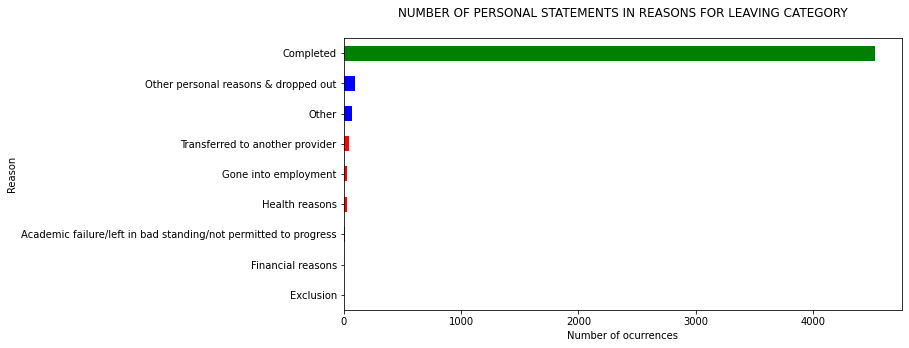

In [80]:
fig = plt.figure(figsize=(10,5))
colors = ['red','red','red','red','red','red','blue','blue','green']
df_6.groupby('Reason').PersonalStatement.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF PERSONAL STATEMENTS IN REASONS FOR LEAVING CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [63]:
for leavereasons in df_6['Reason'].unique():
    print(leavereasons)
    all_words = ' '.join([text for text in df_6.loc[df_6['Reason'].str.contains(leavereasons),'PersonalStatement']])
    from wordcloud import WordCloud
    
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [64]:
def print_plot(index):
    example = df_6[df_6.index == index][['PersonalStatement', 'Reason']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Reason:', example[1])

In [65]:
print_plot(5)

My passion for History began at a young age, with interest in military history, particularly the Great War and WW2, evolving into enthusiasm for all historic military campaigns, the Boer War, Napoleonic wars, medieval times and the Crusades. Amassing a home library of military history I enjoyed studying tactics and weapons, and visiting the Royal Armouries, whilst maturing I explored the politics of conflicts. Visiting historical sites including The Somme battlefields and memorials, and castles in France and Britain, invoked passion to study the development of weapons throughout history, from hand-held weapons, through Trebuchets to Howitzers, to modern aircraft. Visiting the Roman villa site, Vindolanda and Hadrians Wall brought what I had read about Romans into perspective and there began my interest in archaeology and classical studies. In school, History fueled my passion further, enthused by Roman and Greek civilisations study, whilst extra-curricular I enjoyed Homer's Liliad, Per

In [66]:
print_plot(4)

Gaining expert knowledge of both law and Business will allow me to access my future career ambition within corporate law. Intrigued with elements of both, I chose to study Business at GCSE and Law at A-Level. This captivation came from seeing the constant changing business environment as well as the need for renewed legislation, undoubtedly relating to everyday life. 
I chose to study Law and Business to develop a core balance of principles; developing a fundamental understanding of how businesses have to operate within the legal framework to ensure consumers are protected when making contracts with them. Contract law fascinates me in the sense of the different elements and consequences surrounding the contract. It is this multi-national area of dynamic law that I want to contribute to and work in. 
While studying History, I participated in a trip to Ypres, Belgium to gain a better understanding of elements of the First World War and the cultural differences between the two countries a

In [67]:
print_plot(6)

I am fascinated how from nothing, one can build a program or a web page others can then use. I want to study this course for the knowledge and expertise it would bring through modules such as programming and web development. One aspect I would like to increase my knowledge in is the back-end of websites and how it links with the front-end.

One major part of my courses both at Level 2 and 3 was website development which has increased my interest in web development and design. For this project, I went with 'Atom' as my development platform. The reason for this was because it was open source and I was drawn to the community based around Atom, which could help me with any problems I encountered. I enjoyed watching new elements appear on the page as I added more lines of HTML and CSS, changing a blank web page into something enjoyable to look at and easy to use. For I created a website college portfolio about myself using HTML and CSS. This website holds information and the work I did thro

In [68]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 2000
# Max number of words in the personal statements.
MAX_SEQUENCE_LENGTH = 300
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_6['PersonalStatement'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 36152 unique tokens.


In [69]:
X = tokenizer.texts_to_sequences(df_6['PersonalStatement'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (4801, 300)


In [70]:
Y = pd.get_dummies(df_6['Reason']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (4801, 9)


In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3600, 300) (3600, 9)
(1201, 300) (1201, 9)


In [72]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Flatten, Dropout, Lambda
from keras.layers.embeddings import Embedding
import tensorflow as tf

In [73]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(9, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          500000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 9)                 909       
                                                                 
Total params: 581,309
Trainable params: 581,309
Non-trainable params: 0
_________________________________________________________________
None


In [74]:
epochs = 10
batch_size = 20

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/6
162/162 [==============================] - 86s 517ms/step - loss: 0.4479 - accuracy: 0.9312 - val_loss: 0.2398 - val_accuracy: 0.9639
Epoch 2/6
162/162 [==============================] - 82s 502ms/step - loss: 0.3357 - accuracy: 0.9383 - val_loss: 0.2390 - val_accuracy: 0.9639
Epoch 3/6
162/162 [==============================] - 82s 509ms/step - loss: 0.3251 - accuracy: 0.9383 - val_loss: 0.2207 - val_accuracy: 0.9639
Epoch 4/6
162/162 [==============================] - 80s 491ms/step - loss: 0.3076 - accuracy: 0.9383 - val_loss: 0.2410 - val_accuracy: 0.9639
Epoch 5/6
162/162 [==============================] - 81s 500ms/step - loss: 0.2867 - accuracy: 0.9383 - val_loss: 0.2548 - val_accuracy: 0.9639
Epoch 6/6
162/162 [==============================] - 79s 487ms/step - loss: 0.2653 - accuracy: 0.9389 - val_loss: 0.2783 - val_accuracy: 0.9639


In [75]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

38/38 [==============================] - 3s 78ms/step - loss: 0.3385 - accuracy: 0.9484
Test set
  Loss: 0.339
  Accuracy: 0.948


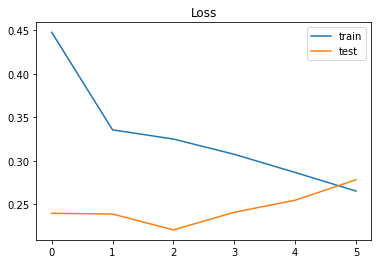

In [76]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

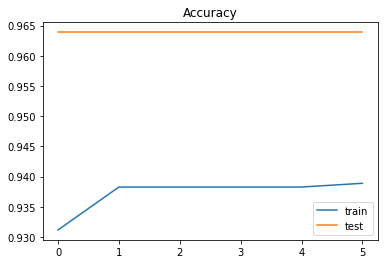

In [77]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();